In [1]:
pip install pillow matplotlib torchvision

Note: you may need to restart the kernel to use updated packages.


In [7]:
import sys
sys.path.append('/app/src')

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import itertools
from model import CycleGANGenerator, UVCGANGenerator, Discriminator
from datamodule import DataModule
from trainer import Trainer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [9]:
def experiment_CycleGAN():
    print()
    print('Running experiment CycleGAN')
    print()
    
    generator_A2B = CycleGANGenerator(3, 3)
    generator_B2A = CycleGANGenerator(3, 3)
    discriminator_A = Discriminator(3)
    discriminator_B = Discriminator(3)

    base_lr = 0.001
    
    config = {
        'datamodule': DataModule(),
        'generator_A2B': generator_A2B,
        'generator_B2A': generator_B2A,
        'discriminator_A': discriminator_A,
        'discriminator_B': discriminator_B,
        'criterion_GAN': nn.MSELoss(),
        'criterion_cycle': nn.L1Loss(),
        'criterion_identity': nn.L1Loss(),
        'optimizer_G': optim.Adam(itertools.chain(generator_A2B.parameters(), generator_B2A.parameters()), lr=base_lr),
        'optimizer_D_A': optim.Adam(discriminator_A.parameters(), lr=4*base_lr),
        'optimizer_D_B': optim.Adam(discriminator_B.parameters(), lr=4*base_lr),
        'max_epoch': 20,
        'output_dir': '../output/cyclegan'
    }
    
    trainer = Trainer(config)
    trainer.fit("epoch_20.pt")

def experiment_UVCGAN():
    print()
    print('Running experiment UVCGAN')
    print()
    
    generator_A2B = UVCGANGenerator(3, 3)
    generator_B2A = UVCGANGenerator(3, 3)
    discriminator_A = Discriminator(3)
    discriminator_B = Discriminator(3)

    base_lr = 0.001
    
    config = {
        'datamodule': DataModule(),
        'generator_A2B': generator_A2B,
        'generator_B2A': generator_B2A,
        'discriminator_A': discriminator_A,
        'discriminator_B': discriminator_B,
        'criterion_GAN': nn.MSELoss(),
        'criterion_cycle': nn.L1Loss(),
        'criterion_identity': nn.L1Loss(),
        'optimizer_G': optim.Adam(itertools.chain(generator_A2B.parameters(), generator_B2A.parameters()), lr=base_lr),
        'optimizer_D_A': optim.Adam(discriminator_A.parameters(), lr=4*base_lr),
        'optimizer_D_B': optim.Adam(discriminator_B.parameters(), lr=4*base_lr),
        'max_epoch': 20,
        'output_dir': '../output/uvcgan'
    }
    
    trainer = Trainer(config)
    trainer.fit()

/usr/local/lib/python3.10/dist-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Epoch 1 training: generator = 6.357929082976447; discriminator A = 0.5222148342182239; discriminator B = 0.5491967070599397
Epoch 1 validation: generator = 4.638168258666992; discriminator A = 0.16821812734007835; discriminator B = 0.21293127596378325
Epoch 2 training: generator = 4.121803160243564; discriminator A = 0.2302028331326114; discriminator B = 0.22633093804121018
Epoch 2 validation: generator = 3.989017605781555; discriminator A = 0.22026366233825684; discriminator B = 0.22073110848665237
Epoch 3 training: generator = 3.9421962012184992; discriminator A = 0.22899762315882577; discriminator B = 0.22981074081526862
Epoch 3 validation: generator = 3.4277325105667114; discriminator A = 0.21867789953947067; discriminator B = 0.2036780235171318
Epoch 4 training: generator = 3.7976014614105225; discriminator A = 0.2561416823003027; discriminator B = 0.23616566475894715
Epoch 4 validation: generator = 3.5229239654541016; discriminator A = 0.21893169462680817; discriminator B = 0.329

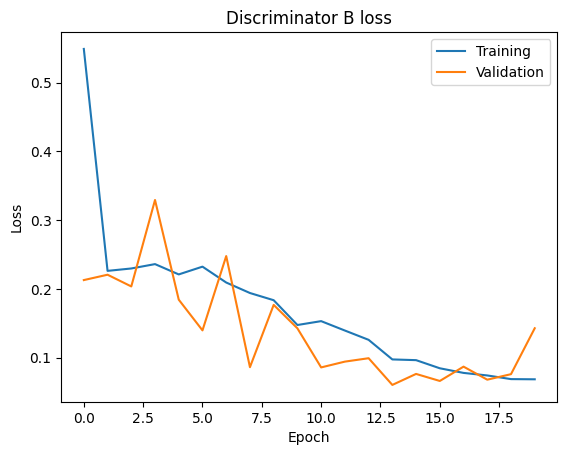

In [5]:
#experiment_CycleGAN()
#experiment_UVCGAN()

In [ ]:
experiment_CycleGAN()


Running experiment CycleGAN

